## Carregamento

In [4]:
# Importações necessárias
import pandas as pd

# Função para carregar os dados
def carregar_dados(caminho_arquivo, coluna_data=None):
    """
    Carrega um arquivo CSV com dados.
    
    Parâmetros:
    - caminho_arquivo (str): Caminho do arquivo CSV.
    - coluna_data (str, opcional): Nome da coluna de datas para converter para datetime.
    
    Retorna:
    - pandas.DataFrame: DataFrame com os dados carregados.
    """
    # Carrega o CSV
    dados = pd.read_csv(caminho_arquivo)
    
    # Converte a coluna de datas para datetime com timezone, se especificada
    if coluna_data:
        dados[coluna_data] = pd.to_datetime(dados[coluna_data], utc=True)
    
    return dados

# Exemplo de uso da função com coluna de datas 'date'
caminho_arquivo = '../data/processed/salary_atualizado.csv'
dados = carregar_dados(caminho_arquivo)

# Exibir as primeiras linhas do DataFrame
dados.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manger,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,220000
8,C.level,9,250000
9,CEO,10,1000000


### Coluna/descrição

In [6]:
# Dicionário com a descrição de cada coluna
colunas_descricao = {
    'Position': 'Cargo do funcionário',
    'Level': 'Nível do cargo',
    'Salary': 'Salário do funcionário'
}

# Gerar o relatório amigável
relatorio = "\n".join([f"{coluna}: {descricao}" for coluna, descricao in colunas_descricao.items()])
print(relatorio)

Position: Cargo do funcionário
Level: Nível do cargo
Salary: Salário do funcionário


## Salário vs. Cargo

### Quais cargos têm os salários mais altos e mais baixos?

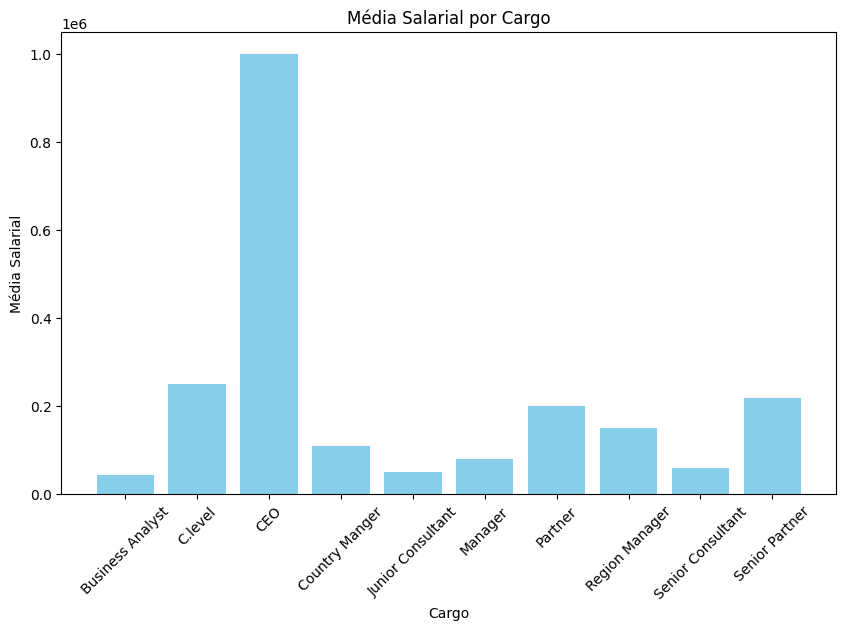

### Análise de Salário por Cargo ###

#### Cargos com Salários Mais Altos e Mais Baixos ####
O cargo com o salário mais alto é 'CEO' com um salário de 1000000.
O cargo com o salário mais baixo é 'Business Analyst' com um salário de 45000.

#### Estatísticas de Salário por Cargo ####
         Position  Média Salarial
 Business Analyst         45000.0
          C.level        250000.0
              CEO       1000000.0
   Country Manger        110000.0
Junior Consultant         50000.0
          Manager         80000.0
          Partner        200000.0
   Region Manager        150000.0
Senior Consultant         60000.0
   Senior Partner        220000.0

### Alternativas e Soluções ###
1. **Revisão de Políticas Salariais:** Considere revisar as políticas salariais para garantir que estejam alinhadas com o mercado e com as responsabilidades dos cargos.
2. **Programas de Desenvolvimento:** Implementar programas de desenvolvimento e treinamento para cargos com salários mais baixos pode ajudar

In [8]:
import matplotlib.pyplot as plt

def analisar_salario_por_cargo(dados):
    """
    Analisa a relação entre cargos e salários em um DataFrame.
    
    Parâmetros:
    - dados (pandas.DataFrame): DataFrame contendo as colunas 'Position' e 'Salary'.
    
    Retorna:
    - str: Relatório detalhado da análise.
    """
    # Verificar se as colunas necessárias estão presentes no DataFrame
    if 'Position' not in dados.columns or 'Salary' not in dados.columns:
        return "Erro: O DataFrame deve conter as colunas 'Position' e 'Salary'."
    
    # Calcular a média dos salários por cargo
    estatisticas_salarios = dados.groupby('Position')['Salary'].mean().reset_index()
    estatisticas_salarios.columns = ['Position', 'Média Salarial']
    
    # Encontrar os cargos com os salários mais altos e mais baixos
    salario_maximo = dados.loc[dados['Salary'].idxmax()]
    salario_minimo = dados.loc[dados['Salary'].idxmin()]
    
    # Gerar o relatório amigável
    relatorio = "### Análise de Salário por Cargo ###\n\n"
    relatorio += "#### Cargos com Salários Mais Altos e Mais Baixos ####\n"
    relatorio += f"O cargo com o salário mais alto é '{salario_maximo['Position']}' com um salário de {salario_maximo['Salary']}.\n"
    relatorio += f"O cargo com o salário mais baixo é '{salario_minimo['Position']}' com um salário de {salario_minimo['Salary']}.\n\n"
    
    relatorio += "#### Estatísticas de Salário por Cargo ####\n"
    relatorio += estatisticas_salarios.to_string(index=False)
    
    # Alternativas e soluções
    relatorio += "\n\n### Alternativas e Soluções ###\n"
    relatorio += "1. **Revisão de Políticas Salariais:** Considere revisar as políticas salariais para garantir que estejam alinhadas com o mercado e com as responsabilidades dos cargos.\n"
    relatorio += "2. **Programas de Desenvolvimento:** Implementar programas de desenvolvimento e treinamento para cargos com salários mais baixos pode ajudar a aumentar a qualificação e, consequentemente, os salários.\n"
    relatorio += "3. **Transparência Salarial:** Promover a transparência salarial dentro da organização pode ajudar a reduzir a insatisfação e aumentar a motivação dos funcionários.\n"
    
    # Plotar gráfico de barras dos salários médios por cargo
    plt.figure(figsize=(10, 6))
    plt.bar(estatisticas_salarios['Position'], estatisticas_salarios['Média Salarial'], color='skyblue')
    plt.xlabel('Cargo')
    plt.ylabel('Média Salarial')
    plt.title('Média Salarial por Cargo')
    plt.xticks(rotation=45)
    plt.show()
    
    return relatorio

# Exemplo de uso da função
relatorio_analise = analisar_salario_por_cargo(dados)
print(relatorio_analise)

## Nível vs. Salário

### Há uma tendência de salários aumentarem com o nível do cargo?

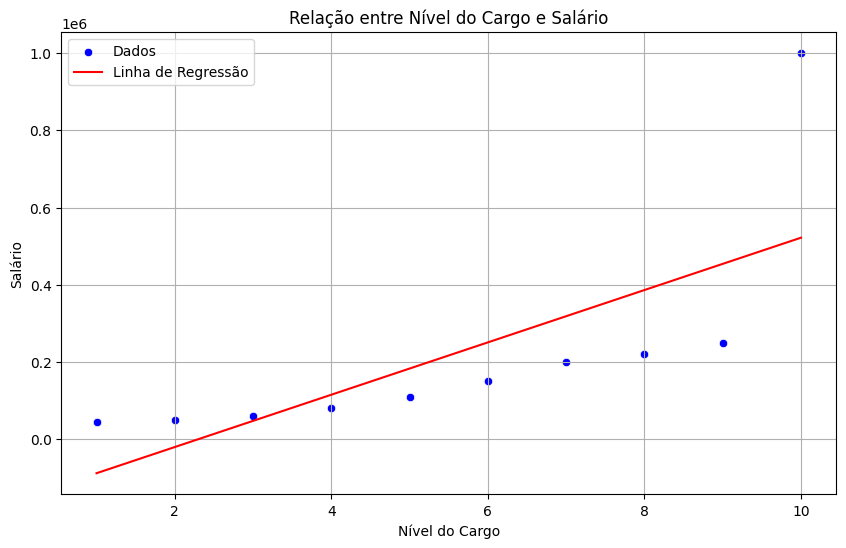

### Análise de Nível vs. Salário ###

#### Estatísticas Descritivas ####
          Level          Salary
count  10.00000       10.000000
mean    5.50000   216500.000000
std     3.02765   285054.088435
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   215000.000000
max    10.00000  1000000.000000

#### Correlação ####
A correlação entre o nível do cargo e o salário é de 0.72, indicando uma forte relação positiva.

#### Análise de Regressão Linear ####
A equação da linha de regressão é: Salário = 67848.48 * Nível + -156666.67

### Alternativas e Soluções ###
1. **Plano de Carreira:** Desenvolver um plano de carreira claro que mostre a progressão salarial com o aumento de nível pode motivar os funcionários.
2. **Treinamento e Desenvolvimento:** Investir em programas de treinamento para ajudar os funcionários a subir de nível e, consequentemente, aumentar seus salários.
3. **Revisão de Políticas Salariais:** Garantir que as po

In [10]:
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

def analisar_nivel_vs_salario(dados):
    """
    Analisa a relação entre o nível do cargo e o salário em um DataFrame.
    
    Parâmetros:
    - dados (pandas.DataFrame): DataFrame contendo as colunas 'Level' e 'Salary'.
    
    Retorna:
    - str: Relatório detalhado da análise.
    """
    # Verificar se as colunas necessárias estão presentes no DataFrame
    if 'Level' not in dados.columns or 'Salary' not in dados.columns:
        return "Erro: O DataFrame deve conter as colunas 'Level' e 'Salary'."
    
    # Calcular estatísticas descritivas
    estatisticas = dados[['Level', 'Salary']].describe()
    
    # Calcular a correlação entre nível e salário
    correlacao = dados['Level'].corr(dados['Salary'])
    
    # Ajustar uma linha de regressão linear
    coeficientes = np.polyfit(dados['Level'], dados['Salary'], 1)
    linha_regressao = np.poly1d(coeficientes)
    
    # Gerar o relatório amigável
    relatorio = "### Análise de Nível vs. Salário ###\n\n"
    relatorio += "#### Estatísticas Descritivas ####\n"
    relatorio += estatisticas.to_string() + "\n\n"
    
    relatorio += "#### Correlação ####\n"
    relatorio += f"A correlação entre o nível do cargo e o salário é de {correlacao:.2f}, indicando uma {'forte' if abs(correlacao) > 0.7 else 'moderada' if abs(correlacao) > 0.4 else 'fraca'} relação positiva.\n\n"
    
    relatorio += "#### Análise de Regressão Linear ####\n"
    relatorio += f"A equação da linha de regressão é: Salário = {coeficientes[0]:.2f} * Nível + {coeficientes[1]:.2f}\n\n"
    
    relatorio += "### Alternativas e Soluções ###\n"
    relatorio += "1. **Plano de Carreira:** Desenvolver um plano de carreira claro que mostre a progressão salarial com o aumento de nível pode motivar os funcionários.\n"
    relatorio += "2. **Treinamento e Desenvolvimento:** Investir em programas de treinamento para ajudar os funcionários a subir de nível e, consequentemente, aumentar seus salários.\n"
    relatorio += "3. **Revisão de Políticas Salariais:** Garantir que as políticas salariais estejam alinhadas com o mercado e com as responsabilidades dos cargos.\n"
    
    # Plotar gráfico de dispersão com linha de regressão
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Level', y='Salary', data=dados, color='blue', label='Dados')
    plt.plot(dados['Level'], linha_regressao(dados['Level']), color='red', label='Linha de Regressão')
    plt.xlabel('Nível do Cargo')
    plt.ylabel('Salário')
    plt.title('Relação entre Nível do Cargo e Salário')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return relatorio

# Exemplo de uso da função
relatorio_nivel_salario = analisar_nivel_vs_salario(dados)
print(relatorio_nivel_salario)

## Níveis com Maior Concentração de Cargos

### Quais níveis têm mais cargos?

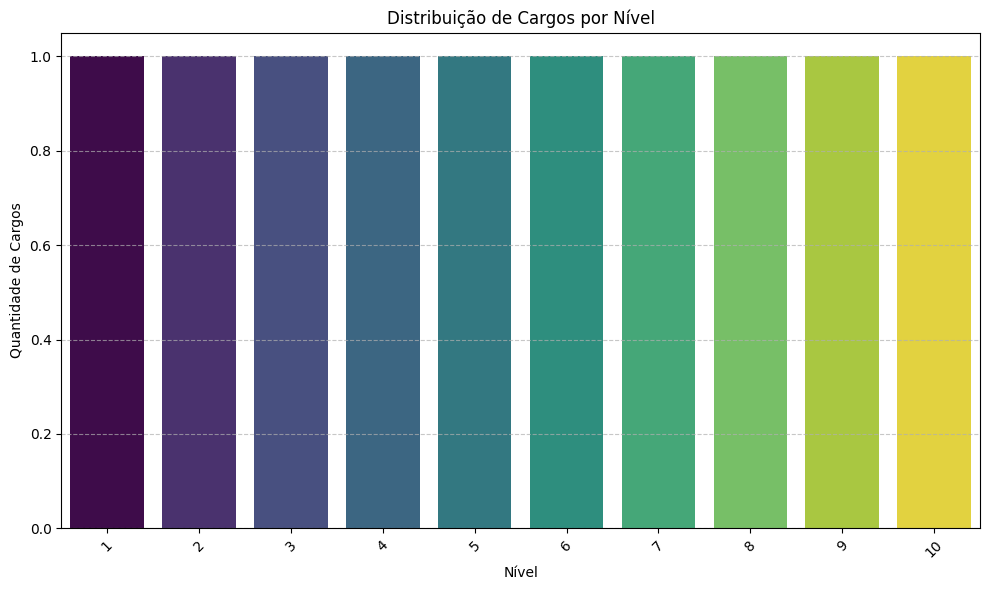

### Análise de Distribuição de Cargos por Nível ###

#### Níveis com Maior e Menor Concentração de Cargos ####
O nível com maior concentração de cargos é '1' com 1 cargos.
O nível com menor concentração de cargos é '1' com 1 cargos.

#### Distribuição Geral ####
A tabela abaixo mostra a quantidade de cargos por nível:
 Level  Quantidade de Cargos
     1                     1
     2                     1
     3                     1
     4                     1
     5                     1
     6                     1
     7                     1
     8                     1
     9                     1
    10                     1

### Alternativas e Soluções ###
1. **Revisão de Alocação de Recursos:** Avaliar se os níveis com maior concentração de cargos estão sobrecarregados e redistribuir responsabilidades, se necessário.
2. **Planejamento de Contratações:** Para níveis com menor concentração de cargos, considerar a necessidade de novas contratações ou reestruturação organizacional.

In [7]:
import seaborn as sns

def analisar_distribuicao_cargos_por_nivel(dados):
    """
    Analisa a distribuição de cargos por nível em um DataFrame.

    Parâmetros:
    - dados (pandas.DataFrame): DataFrame contendo as colunas 'Position' e 'Level'.

    Retorna:
    - str: Relatório detalhado da análise.
    """
    import matplotlib.pyplot as plt

    # Verificar se as colunas necessárias estão presentes no DataFrame
    if 'Position' not in dados.columns or 'Level' not in dados.columns:
        return "Erro: O DataFrame deve conter as colunas 'Position' e 'Level'."

    # Contar a quantidade de cargos por nível
    distribuicao_cargos = dados.groupby('Level')['Position'].count().reset_index()
    distribuicao_cargos.columns = ['Level', 'Quantidade de Cargos']

    # Identificar os níveis com maior e menor concentração de cargos
    nivel_mais_cargos = distribuicao_cargos.loc[distribuicao_cargos['Quantidade de Cargos'].idxmax()]
    nivel_menos_cargos = distribuicao_cargos.loc[distribuicao_cargos['Quantidade de Cargos'].idxmin()]

    # Gerar o relatório amigável
    relatorio = "### Análise de Distribuição de Cargos por Nível ###\n\n"
    relatorio += "#### Níveis com Maior e Menor Concentração de Cargos ####\n"
    relatorio += f"O nível com maior concentração de cargos é '{nivel_mais_cargos['Level']}' com {nivel_mais_cargos['Quantidade de Cargos']} cargos.\n"
    relatorio += f"O nível com menor concentração de cargos é '{nivel_menos_cargos['Level']}' com {nivel_menos_cargos['Quantidade de Cargos']} cargos.\n\n"

    relatorio += "#### Distribuição Geral ####\n"
    relatorio += "A tabela abaixo mostra a quantidade de cargos por nível:\n"
    relatorio += distribuicao_cargos.to_string(index=False) + "\n\n"

    relatorio += "### Alternativas e Soluções ###\n"
    relatorio += "1. **Revisão de Alocação de Recursos:** Avaliar se os níveis com maior concentração de cargos estão sobrecarregados e redistribuir responsabilidades, se necessário.\n"
    relatorio += "2. **Planejamento de Contratações:** Para níveis com menor concentração de cargos, considerar a necessidade de novas contratações ou reestruturação organizacional.\n"
    relatorio += "3. **Treinamento e Desenvolvimento:** Implementar programas de treinamento para ajudar os funcionários a progredirem para níveis com maior demanda.\n"
    relatorio += "4. **Análise de Eficiência:** Avaliar se a distribuição atual está alinhada com os objetivos estratégicos da organização.\n"

    # Plotar gráfico de barras da distribuição de cargos por nível
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Level', y='Quantidade de Cargos', data=distribuicao_cargos, hue='Level', dodge=False, palette='viridis', legend=False)
    plt.xlabel('Nível')
    plt.ylabel('Quantidade de Cargos')
    plt.title('Distribuição de Cargos por Nível')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    return relatorio

# Exemplo de uso da função
relatorio_distribuicao = analisar_distribuicao_cargos_por_nivel(dados)
print(relatorio_distribuicao)